In [1]:
import import_files as MrtRecommendationDependencies
from ridership_transformer import RidershipTransformer
from stationarity_test import StationarityTest
from datetime import datetime
### standard libs
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [13]:
df = pd.read_csv(MrtRecommendationDependencies.get_dataset_path("cubao.csv"), parse_dates=['date'])
transformed_df = RidershipTransformer(df).transform()
entry_df = transformed_df.drop('exit', axis=1)
entry_df.set_index('datetime', inplace=True)
entry_df.sort_index(inplace=True)
two_week_copy = entry_df[0:5000].copy()

In [3]:
entry_df.head()

,entry
datetime,
2018-07-01 04:00:00,299
2018-07-01 05:00:00,1549
2018-07-01 06:00:00,1007
2018-07-01 07:00:00,971
2018-07-01 08:00:00,1501


In [30]:
entry_df.loc[datetime(2018,7,1,4,0,0)]

entry    299
Name: 2018-07-01 04:00:00, dtype: int64

In [14]:
prophet = Prophet(daily_seasonality=True, weekly_seasonality=True)

In [15]:
prophet.add_country_holidays(country_name="PH")

In [16]:
two_week_copy['ds'] = two_week_copy.index
two_week_copy['y'] = two_week_copy.entry

In [17]:
prophet.fit(two_week_copy)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [23]:
future = prophet.make_future_dataframe(periods=280,freq='h',include_history=False)

In [24]:
future

,ds
0,2019-03-07 21:00:00
1,2019-03-07 22:00:00
2,2019-03-07 23:00:00
3,2019-03-08 00:00:00
4,2019-03-08 01:00:00
...,...
275,2019-03-19 08:00:00
276,2019-03-19 09:00:00
277,2019-03-19 10:00:00
278,2019-03-19 11:00:00


In [25]:
forecast = prophet.predict(future)

In [26]:
test = entry_df[5001:5280].copy()

In [21]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Bonifacio Day,Bonifacio Day_lower,Bonifacio Day_upper,Christmas Day,...,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-03-07 21:00:00,1124.258912,492.943887,1177.479389,1124.258912,1124.258912,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,114.371691,114.371691,114.371691,0.0,0.0,0.0,826.281704
1,2019-03-07 22:00:00,1124.205400,13.888553,679.845352,1124.205400,1124.205400,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,117.455810,117.455810,117.455810,0.0,0.0,0.0,342.697521
2,2019-03-07 23:00:00,1124.151888,-262.449552,427.132876,1124.151888,1124.151888,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,120.049927,120.049927,120.049927,0.0,0.0,0.0,74.608388
3,2019-03-08 00:00:00,1124.098376,-382.551091,295.354511,1124.098376,1124.098376,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,122.109460,122.109460,122.109460,0.0,0.0,0.0,-27.633939
4,2019-03-08 01:00:00,1124.044864,-357.741344,314.078461,1124.044864,1124.044864,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,123.594021,123.594021,123.594021,0.0,0.0,0.0,-35.637958


In [18]:
test.head(20)

,entry
datetime,
2018-10-21 05:00:00,1148
2018-10-21 06:00:00,1249
2018-10-21 07:00:00,917
2018-10-21 08:00:00,716
2018-10-21 09:00:00,1048
2018-10-21 10:00:00,1060
2018-10-21 11:00:00,1692
2018-10-21 12:00:00,1637
2018-10-21 13:00:00,1651


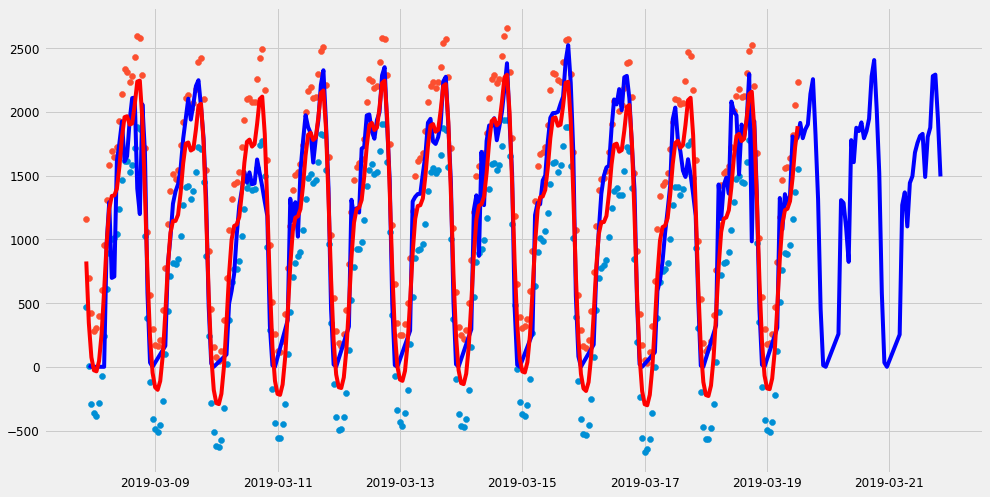

In [27]:
plt.figure(figsize=(15,8))
plt.plot(test.index, test.entry, 'b-')
plt.plot(forecast.ds, forecast.yhat, 'r-',)
plt.scatter(forecast.ds, forecast.yhat_lower)
plt.scatter(forecast.ds, forecast.yhat_upper)
plt.show()

pandas._libs.tslibs.timestamps.Timestamp